<a href="https://colab.research.google.com/github/LeonardoMafra/Python_Data_Science/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries para estudar sobre normalização de textos

# https://www.nltk.org/
# https://spacy.io/

In [2]:
from google import colab as cl
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_upload = cl.files.upload()

Saving B2W-Reviews01.csv to B2W-Reviews01 (1).csv


In [4]:
dt = pd.read_csv('B2W-Reviews01.csv')

<ipython-input-4-9655d9ecec15>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('B2W-Reviews01.csv')


In [5]:
dt.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [6]:
# gerando vizualização

profile = ProfileReport(dt, title  = 'avaliacoes_americanas')

In [7]:
profile.to_file('americanas.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:20<00:00,  1.46s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
dt.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [10]:
dt[['product_name','site_category_lv1','review_text','recommend_to_a_friend']]

,product_name,site_category_lv1,review_text,recommend_to_a_friend
0,Notebook Asus Vivobook Max X541NA-GO472T Intel...,Informática,Estou contente com a compra entrega rápida o ú...,Yes
1,Copo Acrílico Com Canudo 500ml Rocie,Utilidades Domésticas,"Por apenas R$1994.20,eu consegui comprar esse ...",Yes
2,Panela de Pressão Elétrica Philips Walita Dail...,Eletroportáteis,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes
3,Betoneira Columbus - Roma Brinquedos,Brinquedos,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,Yes
4,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",TV e Home Theater,"A entrega foi no prazo, as americanas estão de...",Yes
...,...,...,...,...
132368,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,Câmeras e Filmadoras,"Vale muito, estou usando no controle do Xbox e...",Yes
132369,Mop Giratório Fit + Refil Extra - At Home,Utilidades Domésticas,"Prático e barato, super indico o produto para ...",Yes
132370,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,Automotivo,Chegou antes do prazo previsto e corresponde a...,Yes
132371,Etiquetas Jurídicas Vade Mecum - Marca Fácil,Papelaria,"Material fraco, poderia ser melhor. Ficou deve...",No


In [11]:
# numeros de avaliacoes nulas

print(f'Avaliações Nulas: {dt["review_text"].isnull().sum()}')

Avaliações Nulas: 3275


In [12]:
#avaliações duplicadas

print(f'Avaliações Nulas: {dt.duplicated(keep=False).sum()}')

Avaliações Nulas: 1907


In [13]:
#remover valores duplicados

dt = dt.drop_duplicates().reset_index(drop=True)

In [14]:
# removendo valores nulos apenas das colunas

dt = dt.dropna(subset=[
    'review_text',
    'overall_rating',
    'recommend_to_a_friend'
])

In [15]:
# numeros de avaliacoes nulas apos a limpeza

print(f'Avaliações Nulas: {dt["review_text"].isnull().sum()}')

Avaliações Nulas: 0


In [16]:
#avaliações duplicadas apos a limpeza

print(f'Avaliações Nulas: {dt.duplicated(keep=False).sum()}')

Avaliações Nulas: 0


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128208 entries, 0 to 131417
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        128208 non-null  object 
 1   reviewer_id            128208 non-null  object 
 2   product_id             128208 non-null  object 
 3   product_name           128148 non-null  object 
 4   product_brand          40040 non-null   object 
 5   site_category_lv1      128202 non-null  object 
 6   site_category_lv2      124361 non-null  object 
 7   review_title           127982 non-null  object 
 8   overall_rating         128208 non-null  int64  
 9   recommend_to_a_friend  128208 non-null  object 
 10  review_text            128208 non-null  object 
 11  reviewer_birth_year    122479 non-null  float64
 12  reviewer_gender        124260 non-null  object 
 13  reviewer_state         124401 non-null  object 
dtypes: float64(1), int64(1), object(12)
memor

In [18]:
# contar ocorrencias de cada valor na coluna 'dados'

contagem = dt['overall_rating'].value_counts()

In [19]:
# calcular o total de observaçoes

total_observacoes = contagem.sum()


In [20]:
# calcular  a porcentagem para cada valor

percentuais = (contagem / total_observacoes) * 100

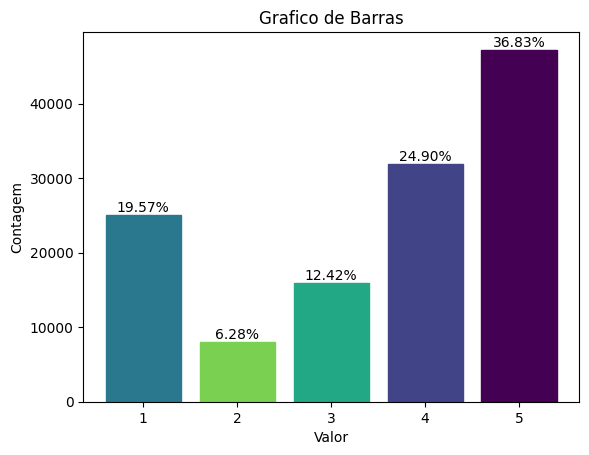

In [30]:
# criar graficos de barras

bars = plt.bar(contagem.index,
               contagem.values, color = 'skyblue')

#adicionar a quantidade em percentual na barra

for bar,percentual in zip(bars,percentuais):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
  f'{percentual:.2f}%',
  ha= 'center', va= 'bottom')

# adicionar rotulos e titulos

plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.title('Grafico de Barras')

# mudar cor entre as barras

for i in range(len(bars)):
  bars[i].set_color(plt.cm.viridis(i/len(bars)))

# mostrar grafico

plt.show()


In [34]:
# funcao para tratar sentimento das notas

def tratar_sentimento(nota):
  if nota in (3,4,5):
    return 1 # positivo
  else:
    return 0 # negativo


dt['sentimento'] = dt['overall_rating'].apply(tratar_sentimento)

dt[['overall_rating', 'sentimento']]

,overall_rating,sentimento
0,4,1
1,4,1
2,4,1
3,4,1
4,5,1
...,...,...
131413,5,1
131414,5,1
131415,4,1
131416,1,0


In [35]:
def tratar_sentimento(row):
  nota = row['overall_rating']
  amigo = row['rrecommend_to_a_friend']


  if amigo =='Yes':
    return 1
  elif (nota in (4,5)):
    return 1
  else:
    return 0